In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#imports and paths
import numpy as np 
import pickle 
import matplotlib.pyplot as plt
from src import plotting
from  src import stats
path= 'data/jaw_images.pkl'

%matplotlib inline

In [3]:
data = pickle.load(open(path,'rb'))

In [4]:
for name, image in data.items():
    print(name,end=', ')

ctsk inj 21, ctsk inj 23, ctsk inj 4, ctsk inj1, ctsk inj10, ctsk inj12, ctsk inj13, ctsk inj14, ctsk inj15, ctsk inj16, ctsk inj17, ctsk inj18, ctsk inj19, ctsk inj2, ctsk inj20, ctsk inj22, ctsk inj25, ctsk inj26, ctsk inj3, ctsk inj4, ctsk inj5, ctsk inj6, ctsk inj7, ctsk inj8, ctsk inj9, ctsk ink 24, matrilinA_inj1, matrilinA_inj10, matrilinA_inj11, matrilinA_inj12, matrilinA_inj13, matrilinA_inj14, matrilinA_inj15, matrilinA_inj16, matrilinA_inj17, matrilinA_inj18, matrilinA_inj2, matrilinA_inj21, matrilinA_inj22, matrilinA_inj23, matrilinA_inj24, matrilinA_inj3, matrilinA_inj4, matrilinA_inj5, matrilinA_inj6, plecA_inj1, plecA_inj10, plecA_inj11, plecA_inj12, plecA_inj13, plecA_inj15, plecA_inj16, plecA_inj17, plecA_inj18, plecA_inj19, plecA_inj20, plecA_inj22, plecA_inj3, plecA_inj4, plecA_inj5, plecA_inj6, plecA_inj7, plecA_inj9, vdrA_inj1, vdrA_inj2, vdrA_inj3, vdrA_inj4, vdrA_inj5, vdrA_inj6, vdrA_inj7, wt_1, wt_10, wt_12, wt_13, wt_14, wt_15, wt_16, wt_17, wt_18, wt_19, wt_2

In [123]:
sampler = stats.BallSampler(data['vdrA_inj2'])

In [127]:
sampler.sample(k=3,N=2000)

In [128]:
res = sampler.get_stat()

[748.66267693   2.58026725   1.42654582]


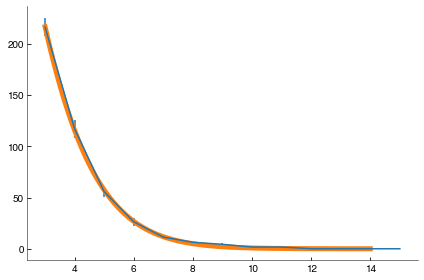

In [129]:
plt.errorbar(sampler.run_params['sizes'], res['avg_empty'], res['std_empty']);
x = np.linspace(3,14,1000)
plt.plot(x,res['fit']['model'](x,*res['fit']['popt']), lw=5)
print(res['fit']['popt'])

In [13]:
# loop over a few jaws:
scores = {}
picklefile = open('output/scores.pkl', 'ab+')
for name in list(data.keys()):
    sampler = stats.BallSampler(data[name])
    sampler.sample(k=3)
    res = sampler.get_stat()
    print(name, res['fit']['popt'][1],res['fit']['pcov'][1,1],res['fit']['popt'][2])
    scores[name] = res
    pickle.dump(res,picklefile)
picklefile.close()

ctsk inj 21 5.454011279996674 0.0024582866877760207 2.2010305029778547
ctsk inj 23 5.997796457410188 0.016804295845514853 1.968370323021165
ctsk inj 4 6.330587877549961 0.004334212397355213 2.2420674423817104
ctsk inj1 6.897002589990285 0.005149849117780893 2.544817414065111
ctsk inj10 7.084643294463647 0.007433398075067527 2.5023878324506996
ctsk inj12 6.883383117326759 0.0044285400958609025 2.415872575191061
ctsk inj13 6.6141801833885605 0.005206899567443351 2.3095672396293008
ctsk inj14 7.519752421568115 0.0028607145623566824 2.4467720687488788
ctsk inj15 4.543889714284028 0.01636887316529915 2.104819198921962
ctsk inj16 6.398830977100337 0.009416018873556429 2.2471708462369615
ctsk inj17 5.583738842390218 0.0029756553661014983 2.360062857091217
ctsk inj18 6.859988084831472 0.0034920315659667644 2.41866414401501
ctsk inj19 5.801590283190469 0.008247549788222053 1.9987890946022662
ctsk inj2 6.7045038667587935 0.0038487076995456842 2.265209602724997
ctsk inj20 5.423786141472502 0.0021

NameError: name 'picklfile' is not defined

In [14]:
picklefile.close()

In [41]:
import re
import collections
import pandas as pd
names =np.array([re.split(' |_',k)[0] for k in list(data.keys())])
categories = np.unique(names)

In [55]:
df = pd.DataFrame()
for i,n in enumerate(categories):
    df[n] = np.array(names==categories[i]).astype(int)
    
pore_size = []
exponent = []
for key,value in scores.items():
    pore_size.append(value['fit']['popt'][1])
    exponent.append(value['fit']['popt'][2])
df['pore_size'] = pore_size
df['exponent'] = exponent

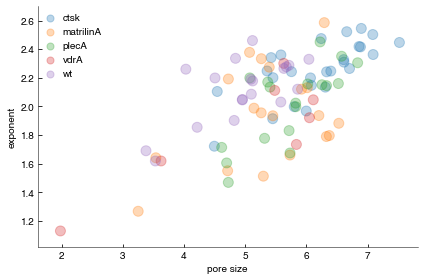

In [85]:
# plt.scatter(df['pore_size'], df['exponent'])
for c in categories:
    plt.scatter(df['pore_size'], df['exponent'], s=100*df[c], alpha=0.3, label=c)
plt.legend();
plt.xlabel('pore size')
plt.ylabel('exponent');

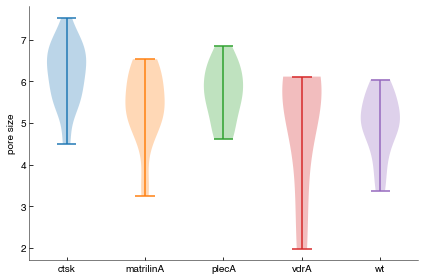

In [105]:
for i,c in enumerate(categories):
    plt.violinplot(df[df[c]==1]['pore_size'],positions=[i])
plt.gca().set_xticks(np.arange(0, len(categories)))
plt.gca().set_xticklabels(categories);
plt.ylabel('pore size');
plt.savefig('pore_size_violin.pdf')